# Working with Time Series in Pandas
> A Summary of lecture "Manipulating Time Series Data in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time_Series_Analysis]
- image: images/google_lagged.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## How to use dates & times with pandas
- Date & time series functionality
    - At the root: data types for date & time information
        - Objects for points in time and periods
        - Attributes & methods reflect time-related details
    - Sequences of dates & periods
        - Series or DataFrame columns
        - Index: convert object into Time Series
     - Many Series/DataFrame methods rely on time information in the index to provide time-series functinoality
 ![time_alias](image/time_alias.png)

### Your first time series
You have learned in the video how to create a sequence of dates using ```pd.date_range()```. You have also seen that each date in the resulting ```pd.DatetimeIndex``` is a ```pd.Timestamp``` with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the ```dayofweek``` and ```weekday_name``` for each date.

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


> Note: ```weekday_name``` attribute is deprecated since 0.23.0. Instead, use ```.day_name()``` method.

## Indexing & resampling time series
- Time series transformation
    - Basic time series transformations include:
        - Parsing string dates and convert to ```datetime64```
        - Selecting & slicing for specific subperiods
        - Setting & changing ```DateTimeIndex``` frequency
            - Upsampling : Higher frequency implies new dates -> missing data
            

### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as ```string``` types, represented as ```dtype``` object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of ```pd.to_datetime()```.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


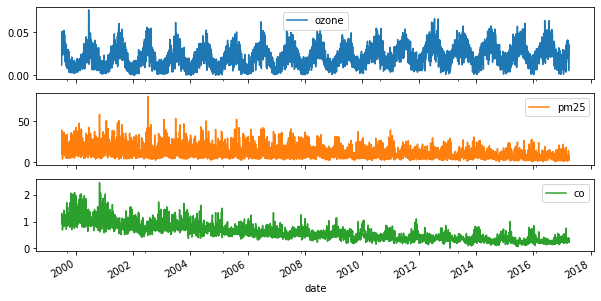

In [3]:
data = pd.read_csv('./dataset/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data
print(data.info())

# Plot data
data.plot(subplots=True);

### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [4]:
yahoo = pd.read_csv('./dataset/yahoo.csv')
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo.set_index('date', inplace=True)
yahoo.head()

price
date             
2013-01-02  20.08
2013-01-03  19.78
2013-01-04  19.86
2013-01-07  19.40
2013-01-08  19.66

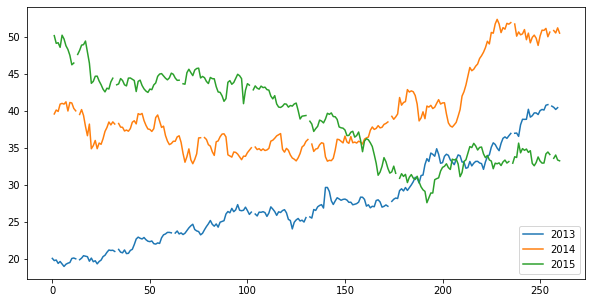

In [5]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price':year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)
    
# Plot prices
prices.plot();

### Set and change time series frequency
In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [6]:
co = pd.read_csv('./dataset/co_cities.csv')
co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)
co.head()

Chicago  Los Angeles  New York
date                                       
2005-01-01  0.317763     0.777657  0.639830
2005-01-03  0.520833     0.349547  0.969572
2005-01-04  0.477083     0.626630  0.905208
2005-01-05  0.348822     0.613814  0.769176
2005-01-06  0.572917     0.792596  0.815761

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


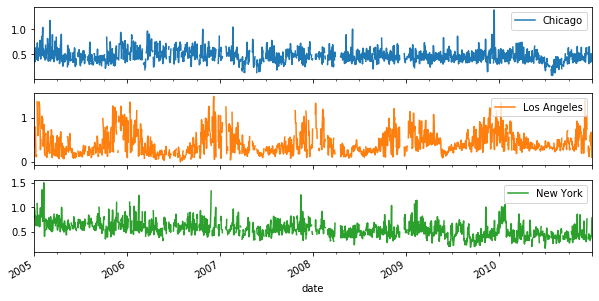

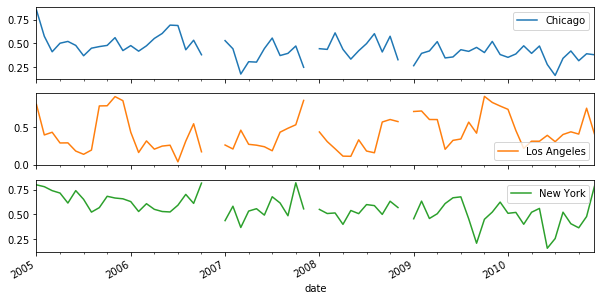

In [7]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True);

# Set Frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True);

## Lags, changes, and returns for stock price series
- Basic time series calculations
    - Typical Time Series manipulations include:
        - Shift or lag values back or forward back in time
        - Get the difference in value for a given time period
        - Compute the percent change over any number of periods
    _ ```pandas``` built-in methods rely on ```pd.DataTimeIndex```

### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was ```.shift()```, which allows you shift all values in a ```Series``` or ```DataFrame``` by a number of periods to a different time along the ```DateTimeIndex```.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

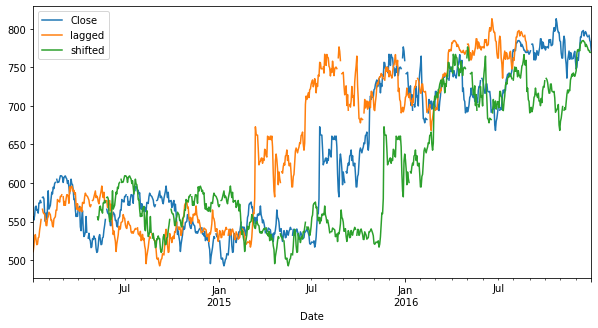

In [8]:
# Import data here
google = pd.read_csv('./dataset/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(periods=90)

# Plot the google price series
google.plot();
plt.savefig('../images/google_lagged.png')

### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function ```.diff()```.

In [24]:
yahoo = yahoo.asfreq('B')

In [25]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo['price'].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(periods=30)

# Inspect the last five rows of price
print(yahoo['price'].tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['diff_30'].sub(yahoo['change_30']).value_counts())

date
2015-12-25      NaN
2015-12-28    33.60
2015-12-29    34.04
2015-12-30    33.37
2015-12-31    33.26
Freq: B, Name: price, dtype: float64
0.0    703
dtype: int64


### Plotting multi-period returns
The last time series method you have learned about in the video was ```.pct_change()```. Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

In [27]:
google = pd.read_csv('./dataset/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('D')

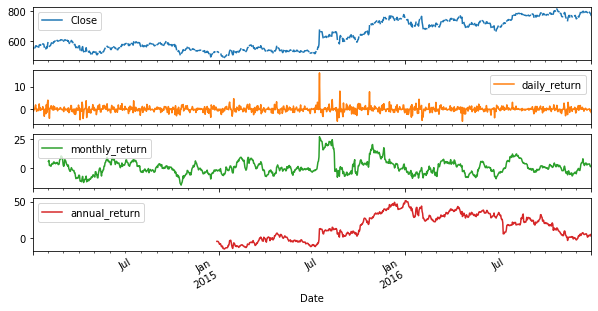

In [30]:
# Create daily_return
google['daily_return'] = google['Close'].pct_change(periods=1) * 100

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30) * 100

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360) * 100

# Plot the result
google.plot(subplots=True);